In [61]:
from common import *
from process_ntuples import *
from process_df import *
from plotting import *
from cuts import apply_cuts, apply_pt_cut
import matplotlib.pyplot as plt
import pickle

import tensorflow as tf
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping

#weights and biases imports
import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint, WandbCallback

In [14]:
print(tf.config.list_physical_devices('GPU'))
# import os
# os.environ['TF_CUDNN_VERSION'] = '8.1.0'


[]


In [31]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

files = os.listdir(dir_path)
TTree = process_ntuple(dir_path, files[0])
files

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root',
 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']

$D^{+}$ : 411

$\Lambda_C^{+}$ : 4122

Apply Cuts Fiducial Region cuts ($𝐷^{+}$ $𝑝_T$ > 8 GeV, |𝜂| < 2.2). ***See cuts.py on how the cuts are applied***

In [7]:
DMesons_df = show(0, TTree, ["DMesons_pt","DMesons_eta", "DMesons_m", "DMesons_fitOutput__Lxy", "DMesons_costhetastar", "DMesons_pdgId"], 20000000)
DMesons_df = remove_empty(DMesons_df)

DMesons_df["DMesons_pt"] = DMesons_df["DMesons_pt"].apply(divide_by_1000)
for col in DMesons_df.columns:
    DMesons_df[col] = DMesons_df[col].apply(list)
    
DMesons_df = apply_cuts(DMesons_df)
pd.set_option('display.max_rows', 10)
DMesons_df

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId
0,[10.047125],[0.08182407170534134],[1862.4176025390625],[2.3395302295684814],[0.25487038493156433],[411]
1,"[18.9937421875, 18.9937421875]","[-1.6619627475738525, -1.6619627475738525]","[1853.90625, 2398.886962890625]","[1.9184143543243408, 1.9184143543243408]","[-0.36730244755744934, -0.0650731548666954]","[411, 4122]"
2,"[10.118494140625, 10.118494140625]","[0.041659336537122726, 0.041659336537122726]","[1874.203125, 2468.1806640625]","[2.8901257514953613, 2.8901257514953613]","[0.06833142042160034, 0.4276972711086273]","[411, 4122]"
3,"[12.579470703125, 12.579470703125]","[-1.1025604009628296, -1.1025604009628296]","[1884.987060546875, 2220.384521484375]","[0.9249186515808105, 0.9249186515808105]","[-0.5603189468383789, -0.41332852840423584]","[411, 4122]"
4,[36.1288359375],[0.6598162055015564],[2235.69873046875],[0.3584118187427521],[0.19036155939102173],[4122]
...,...,...,...,...,...,...
8235046,[17.96],[-0.6264557838439941],[1865.6043701171875],[5.87862491607666],[0.45278045535087585],[411]
8235047,"[62.91061328125, 62.91061328125]","[0.2775037884712219, 0.2775037884712219]","[1847.262451171875, 2131.1259765625]","[11.870012283325195, 11.870012283325195]","[-0.9544855356216431, -0.9355815052986145]","[411, 4122]"
8235048,"[14.8181767578125, 14.8181767578125]","[-2.1479332447052, -2.1479332447052]","[1836.0997314453125, 2165.72412109375]","[2.027026653289795, 2.027026653289795]","[-0.9712575674057007, -0.9517184495925903]","[411, 4122]"
8235049,[39.3814296875],[1.5503557920455933],[2210.86669921875],[0.17065481841564178],[-0.332907497882843],[4122]


In [60]:
#save to disk
# with open('DMesons_df.pickle', 'wb') as f:
#     pickle.dump(DMesons_df, f)


In [4]:
#open
with open('DMesons_df.pickle', 'rb') as f:
    DMesons_df = pickle.load(f)


In [5]:
DMesons_df

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId,particle_type
0,[10.047125],[0.08182407170534134],[1862.4176025390625],[2.3395302295684814],[0.25487038493156433],[411],only_411
1,"[18.9937421875, 18.9937421875]","[-1.6619627475738525, -1.6619627475738525]","[1853.90625, 2398.886962890625]","[1.9184143543243408, 1.9184143543243408]","[-0.36730244755744934, -0.0650731548666954]","[411, 4122]",both
2,"[10.118494140625, 10.118494140625]","[0.041659336537122726, 0.041659336537122726]","[1874.203125, 2468.1806640625]","[2.8901257514953613, 2.8901257514953613]","[0.06833142042160034, 0.4276972711086273]","[411, 4122]",both
3,"[12.579470703125, 12.579470703125]","[-1.1025604009628296, -1.1025604009628296]","[1884.987060546875, 2220.384521484375]","[0.9249186515808105, 0.9249186515808105]","[-0.5603189468383789, -0.41332852840423584]","[411, 4122]",both
4,[36.1288359375],[0.6598162055015564],[2235.69873046875],[0.3584118187427521],[0.19036155939102173],[4122],only_4122
...,...,...,...,...,...,...,...
8235046,[17.96],[-0.6264557838439941],[1865.6043701171875],[5.87862491607666],[0.45278045535087585],[411],only_411
8235047,"[62.91061328125, 62.91061328125]","[0.2775037884712219, 0.2775037884712219]","[1847.262451171875, 2131.1259765625]","[11.870012283325195, 11.870012283325195]","[-0.9544855356216431, -0.9355815052986145]","[411, 4122]",both
8235048,"[14.8181767578125, 14.8181767578125]","[-2.1479332447052, -2.1479332447052]","[1836.0997314453125, 2165.72412109375]","[2.027026653289795, 2.027026653289795]","[-0.9712575674057007, -0.9517184495925903]","[411, 4122]",both
8235049,[39.3814296875],[1.5503557920455933],[2210.86669921875],[0.17065481841564178],[-0.332907497882843],[4122],only_4122


In [58]:
DMesons_df2 = show(0, TTree, ["DMesons_daughterInfo__pt", "DMesons_daughterInfo__eta", "DMesons_daughterInfo__phi", "DMesons_daughterInfo__pdgId"], 100)
DMesons_df2 = remove_empty(DMesons_df2)

In [59]:
DPlus = [-321, 211, 211]
LambdaC = [2212, -321, 211]

remove_lambda = []

count = 0
for index, row in DMesons_df2.iterrows():
    if count == 50:
        break
    count+=1
    
    pts = row['DMesons_daughterInfo__pt']
    etas = row['DMesons_daughterInfo__eta']
    phis = row['DMesons_daughterInfo__phi']
    pdgids = row["DMesons_daughterInfo__pdgId"]
    
    #loop through until the first lambda encountered
    for i in range(len(pdgids) - 1):
        #if there are multiple lambda baryons
        if len(pdgids) > 2:
            #stop at the first lambda and keep the higher proton pt valued lambda
            if list(pdgids[i]) == LambdaC:
                l1_pt, l2_pt = pts[i][0], pts[i + 1][0]
                if (l1_pt > l2_pt):
                    #Lambda 1's proton has higher pt
                    remove_lambda.append((index, i + 1))
                elif (l1_pt < l2_pt):
                    #Lambda 2's proton has higher pt!
                    remove_lambda.append((index, i))
                else:
                    raise Exception("Error: Are the proton pt vaules equal?")
                    
len(remove_lambda)

3

In [24]:
#takes tuples of shape (2,) / (index, column)
def remove_particles_from_df(df, tuple_list):
    for tup in tuple_list:
        index, column = tup
        print(index, column)
        
        new_df = df.copy()
        for i in range(len(DMesons_df.iloc[index, 0][column]) + 1):
            #new_df["DMesons_daughterInfo__pt"] = new_df["DMesons_daughterInfo__pt"].apply(lambda x: print(x))
            val = new_df.iloc[index, i][column]
            print(val)
    df = df.drop(index, axis = 0)
    return df
#df = remove_particles_from_df(DMesons_df, remove_lambda)

#for now just remove the rows
indices = [i for i, x in enumerate(DMesons_df2[DMesons_df2.columns[0]]) if len(x) > 2]
DMesons_df2 = DMesons_df2.drop(indices)
DMesons_df2 = DMesons_df2.reset_index(drop=True)
DMesons_df2["DMesons_daughterInfo__pt"] = DMesons_df2["DMesons_daughterInfo__pt"].apply(divide_by_1000)
DMesons_df2

pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', None)

# print("-----------------")
# print(DMesons_df.iloc[32, 0][2])
# print(DMesons_df.iloc[32, 1][2])
# print(DMesons_df.iloc[32, 2][2])
# print(DMesons_df.iloc[32, 3][2])

In [5]:
# create a new column 'particle_type' based on the pdgId column
func = lambda x: 'only_411' if x == [411] else ('only_4122' if x == [4122] else 'both')
DMesons_df['particle_type'] = DMesons_df['DMesons_pdgId'].apply(func)

# separate the rows based on the new column
only_411 = DMesons_df[DMesons_df['particle_type'] == 'only_411']
only_4122 = DMesons_df[DMesons_df['particle_type'] == 'only_4122']
both = DMesons_df[DMesons_df['particle_type'] == 'both']

new_df = DMesons_df[DMesons_df['particle_type'] != 'both']
new_df = new_df.reset_index(drop=True)

new_df.loc[:, 'DMesons_pt'] = new_df['DMesons_pt'].apply(lambda x: float(x[0]))
new_df.loc[:, 'DMesons_eta'] = new_df['DMesons_eta'].apply(lambda x: float(x[0]))
new_df.loc[:, 'DMesons_m'] = new_df['DMesons_m'].apply(lambda x: float(x[0]))
new_df.loc[:, 'DMesons_fitOutput__Lxy'] = new_df['DMesons_fitOutput__Lxy'].apply(lambda x: float(x[0]))
new_df.loc[:, 'DMesons_costhetastar'] = new_df['DMesons_costhetastar'].apply(lambda x: float(x[0]))
new_df.loc[:, 'DMesons_pdgId'] = new_df['DMesons_pdgId'].apply(lambda x: int(x[0]))
new_df = new_df.drop('particle_type', axis=1)
new_df

/tmp/ipykernel_30552/2689228095.py:13: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, 'DMesons_pt'] = new_df['DMesons_pt'].apply(lambda x: float(x[0]))
/tmp/ipykernel_30552/2689228095.py:14: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  new_df.loc[:, 'DMesons_eta'] = new_df['DMesons_eta'].apply(lambda x: float(x[0]))
/tmp/ipykernel_30552/2689228095.py:15: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, us

,DMesons_pt,DMesons_eta,DMesons_m,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId
0,10.047125,0.081824,1862.417603,2.339530,0.254870,411
1,36.128836,0.659816,2235.698730,0.358412,0.190362,4122
2,14.835231,-0.928085,1867.131470,2.899070,0.684572,411
3,8.800141,-1.486876,2174.800781,0.246351,-0.737246,4122
4,30.092365,0.434246,2306.049072,7.426617,-0.937342,4122
...,...,...,...,...,...,...
2515990,24.477744,-0.272090,1882.772461,3.593372,0.539289,411
2515991,14.971446,-1.956944,1835.712280,2.374407,0.863583,411
2515992,12.734207,-0.039695,1867.319092,5.151422,0.461929,411
2515993,17.960000,-0.626456,1865.604370,5.878625,0.452780,411


In [6]:
D = 0
Lambda = 0
for pdgId in new_df["DMesons_pdgId"]:
    if pdgId == 411:
        D+=1
    elif pdgId == 4122:
        Lambda+=1
print(D, Lambda)

1566666 949329


In [7]:
only_411 = only_411.reset_index(drop=True)
only_411.loc[:, 'DMesons_pt'] = only_411['DMesons_pt'].apply(lambda x: float(x[0]))
only_411.loc[:, 'DMesons_eta'] = only_411['DMesons_eta'].apply(lambda x: float(x[0]))
only_411.loc[:, 'DMesons_m'] = only_411['DMesons_m'].apply(lambda x: float(x[0]))
only_411.loc[:, 'DMesons_fitOutput__Lxy'] = only_411['DMesons_fitOutput__Lxy'].apply(lambda x: float(x[0]))
only_411.loc[:, 'DMesons_costhetastar'] = only_411['DMesons_costhetastar'].apply(lambda x: float(x[0]))
only_411.loc[:, 'DMesons_pdgId'] = only_411['DMesons_pdgId'].apply(lambda x: int(x[0]))
only_411 = only_411.drop('particle_type', axis=1)

only_4122 = only_4122.reset_index(drop=True)
only_4122.loc[:, 'DMesons_pt'] = only_4122['DMesons_pt'].apply(lambda x: float(x[0]))
only_4122.loc[:, 'DMesons_eta'] = only_4122['DMesons_eta'].apply(lambda x: float(x[0]))
only_4122.loc[:, 'DMesons_m'] = only_4122['DMesons_m'].apply(lambda x: float(x[0]))
only_4122.loc[:, 'DMesons_fitOutput__Lxy'] = only_4122['DMesons_fitOutput__Lxy'].apply(lambda x: float(x[0]))
only_4122.loc[:, 'DMesons_costhetastar'] = only_4122['DMesons_costhetastar'].apply(lambda x: float(x[0]))
only_4122.loc[:, 'DMesons_pdgId'] = only_4122['DMesons_pdgId'].apply(lambda x: int(x[0]))
only_4122 = only_4122.drop('particle_type', axis=1)

new_df = new_df.drop('DMesons_m', axis=1)
only_411 = only_411.drop('DMesons_m', axis=1)
only_4122 = only_4122.drop('DMesons_m', axis=1)

only_411

/tmp/ipykernel_30552/3838657620.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  only_411.loc[:, 'DMesons_pt'] = only_411['DMesons_pt'].apply(lambda x: float(x[0]))
/tmp/ipykernel_30552/3838657620.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  only_411.loc[:, 'DMesons_eta'] = only_411['DMesons_eta'].apply(lambda x: float(x[0]))
/tmp/ipykernel_30552/3838657620.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavio

,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar,DMesons_pdgId
0,10.047125,0.081824,2.339530,0.254870,411
1,14.835231,-0.928085,2.899070,0.684572,411
2,9.691489,1.568715,1.241371,0.439036,411
3,28.525160,-1.046752,1.982312,0.528804,411
4,40.980965,-2.036715,4.664388,0.302332,411
...,...,...,...,...,...
1566661,23.254861,-0.435785,1.341532,0.385443,411
1566662,24.477744,-0.272090,3.593372,0.539289,411
1566663,14.971446,-1.956944,2.374407,0.863583,411
1566664,12.734207,-0.039695,5.151422,0.461929,411


In [8]:
#D and Lambda
new_df['DMesons_pdgId'] = new_df['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train, X_test, y_train, y_test = train_test_split(new_df[['DMesons_pt','DMesons_eta', 'DMesons_fitOutput__Lxy', 'DMesons_costhetastar']], new_df['DMesons_pdgId'], test_size=0.2, random_state=42)

#only DMesons
only_411['DMesons_pdgId'] = only_411['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train1, X_test1, y_train1, y_test1 = train_test_split(only_411[['DMesons_pt', 'DMesons_eta', 'DMesons_fitOutput__Lxy', 'DMesons_costhetastar']], only_411['DMesons_pdgId'], test_size=0.2, random_state=42)

#only Lambda
only_4122['DMesons_pdgId'] = only_4122['DMesons_pdgId'].replace({411: 0, 4122: 1})
X_train2, X_test2, y_train2, y_test2 = train_test_split(only_4122[['DMesons_pt', 'DMesons_eta', 'DMesons_fitOutput__Lxy', 'DMesons_costhetastar']], only_4122['DMesons_pdgId'], test_size=0.2, random_state=42)

In [9]:
print(np.shape(X_train), np.shape(X_test))

X_train

(2012796, 4) (503199, 4)


,DMesons_pt,DMesons_eta,DMesons_fitOutput__Lxy,DMesons_costhetastar
1770788,9.837925,-0.805652,1.641304,0.970467
2233641,13.181294,-0.669969,0.592829,0.848776
1882175,31.453314,1.931551,0.475234,0.088490
77176,9.108838,1.001920,1.919612,0.283070
2042686,11.343927,-0.151999,1.514526,0.846359
...,...,...,...,...
110268,9.626153,0.591553,0.014535,-0.180268
1692743,19.623363,0.220184,1.021144,0.526883
2356330,51.873598,0.269165,13.006821,0.966141
2229084,15.061853,-0.676069,2.240869,0.664589


In [13]:
# Write to disk
# with open('DMesons_ready.pickle', 'wb') as f:
#     pickle.dump(new_df, f)

# with open('only_411.pickle', 'wb') as f:
#     pickle.dump(only_411, f)
    
# with open('only_4122.pickle', 'wb') as f:
#     pickle.dump(only_4122, f)

In [68]:
# Read
with open('pickled/DMesons_ready.pickle', 'rb') as f:
    DMesons_ready = pickle.load(f)

with open('pickled/only_411.pickle', 'rb') as f:
    only_411 = pickle.load(f)
    
with open('pickled/only_4122.pickle', 'rb') as f:
    only_4122 = pickle.load(f)

In [13]:
# plt.figure()
# plt.title("Pt)"
# hists = plt.hist(X_train1["DMesons_pt"], bins = 100, label = "background")
# hists = plt.hist(X_train2["DMesons_pt"], bins = 100, label = "signal")
# plt.legend()
# plt.show()

# plt.figure()
# plt.title("Lxy)"
# hists1 = plt.hist(X_train1["DMesons_fitOutput__Lxy"], bins = 100, label = "background")
# hists1 = plt.hist(X_train2["DMesons_fitOutput__Lxy"], bins = 100, label = "signal")
# plt.legend()
# plt.show()

# plt.figure()
# plt.title("costhetastar")
# hists2 = plt.hist(X_train1["DMesons_costhetastar"], bins = 100, label = "background")
# hists2 = plt.hist(X_train2["DMesons_costhetastar"], bins = 100, label = "signal")
# plt.legend()
# plt.show()

In [77]:
wandb.init(
    # set the wandb project where this run will be logged
    project="ATLAS_DNN",

    # track hyperparameters and run metadata with wandb.config
    config={
        "layer_1": 64,
        "activation_1": "relu",
        "dropout": 0.5,
        "layer_2": 32,
        "activation_2": "relu",
        "dropout": 0.5,
        "output_layer": 1,
        "output_activation": "sigmoid",
        "optimizer": "adam",
        "loss": "binary_crossentropy",
        "metric": "accuracy",
        "epoch": 50,
        "batch_size": 32
    }
)

config = wandb.config

epoch,▁▂▃▅▆▇█
loss,█▂▂▂▁▁▁
val_loss,▆█▇▄▁▃▄
best_epoch,4
best_val_loss,0.16152
epoch,6
loss,0.17664
val_loss,0.16496


In [78]:
# #model
# model = Sequential([
#     Dense(3, activation='relu', input_shape=(X_train.shape[1],)),
#     Dropout(0.5),
#     Dense(2, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# model.summary()

class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        
        self.dense1 = Dense(64, activation='relu')
        self.dropout1 = Dropout(0.5)
        
        self.dense2 = Dense(32, activation='relu')
        self.dropout2 = Dropout(0.5)
        
        self.dense3 = Dense(1, activation='sigmoid')
        
    def call(self, x):
        x = self.dense1(x)
        x = self.dropout1(x)
        
        x = self.dense2(x)
        x = self.dropout2(x)
        
        x = self.dense3(x)
        
        return x
    
model = MyModel()
model.build(input_shape=(None, X_train.shape[1]))
model.summary()


Model: "my_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            multiple                  320       
                                                                 
 dropout_12 (Dropout)        multiple                  0         
                                                                 
 dense_19 (Dense)            multiple                  2080      
                                                                 
 dropout_13 (Dropout)        multiple                  0         
                                                                 
 dense_20 (Dense)            multiple                  33        
                                                                 
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


In [79]:
#Compile
model.compile(optimizer='adam', loss='binary_crossentropy')

early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
# checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True, verbose=1)
# tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)
#Train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop, WandbCallback(), tf.keras.callbacks.History()])

#Evaluate testing set
loss = model.evaluate(X_test, y_test)
print("Loss: {}".format(loss))

Epoch 1/50
62899/62900 [============================>.] - ETA: 0s - loss: 0.1933

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230405_190835-0bz4n2ac/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230405_190835-0bz4n2ac/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230405_190835-0bz4n2ac/files/model-best)... Done. 0.0s


62900/62900 [==============================] - 106s 2ms/step - loss: 0.1933 - val_loss: 0.1619
Epoch 2/50
62867/62900 [============================>.] - ETA: 0s - loss: 0.1713

wandb: ERROR Can't save model in the h5py format. The model will be saved as as an W&B Artifact in the 'tf' format.


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230405_190835-0bz4n2ac/files/model-best/assets


INFO:tensorflow:Assets written to: /global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230405_190835-0bz4n2ac/files/model-best/assets
wandb: Adding directory to artifact (/global/u2/g/gupsingh/ATLAS_DNN/wandb/run-20230405_190835-0bz4n2ac/files/model-best)... Done. 0.0s


62900/62900 [==============================] - 106s 2ms/step - loss: 0.1713 - val_loss: 0.1589
Epoch 3/50
62900/62900 [==============================] - 105s 2ms/step - loss: 0.1690 - val_loss: 0.1601
Epoch 4/50
62900/62900 [==============================] - 105s 2ms/step - loss: 0.1677 - val_loss: 0.1596
Epoch 5/50
62900/62900 [==============================] - 104s 2ms/step - loss: 0.1664 - val_loss: 0.1592
Epoch 5: early stopping
15725/15725 [==============================] - 17s 1ms/step - loss: 0.1592
Loss: 0.15923777222633362


2023-04-05 19:14:29.498789: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-05 19:14:29.512023: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-04-05 19:14:29.651355: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2023-04-05 19:14:29

In [80]:
wandb.finish()

epoch,▁▃▅▆█
loss,█▂▂▁▁
val_loss,█▁▄▃▂
best_epoch,1
best_val_loss,0.15888
epoch,4
loss,0.16641
val_loss,0.15924


------------------------------------------ Finished training, now analyze ------------------------------------------

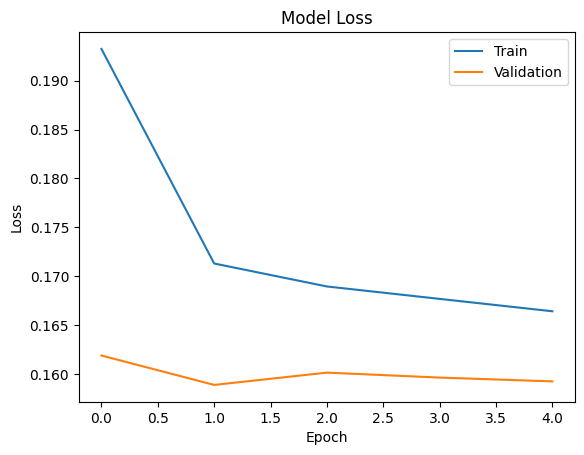

In [81]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [82]:
predictions = model.predict(X_test)
predictions[:10]

15725/15725 [==============================] - 15s 936us/step


array([[1.        ],
       [0.93646634],
       [1.        ],
       [0.04256065],
       [1.        ],
       [0.08875079],
       [0.08767112],
       [0.09558577],
       [0.17404631],
       [1.        ]], dtype=float32)

In [83]:
predictions1 = model.predict(X_test1)
predictions1[:10]

9792/9792 [==============================] - 10s 976us/step


array([[0.04406937],
       [0.0841182 ],
       [0.04256065],
       [0.04256065],
       [0.04256065],
       [0.0428603 ],
       [0.04256065],
       [0.04256065],
       [0.04840473],
       [0.08463758]], dtype=float32)

In [84]:
predictions2 = model.predict(X_test2)
predictions2[:10]

5934/5934 [==============================] - 6s 938us/step


array([[1.        ],
       [1.        ],
       [0.39854553],
       [1.        ],
       [0.987347  ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ],
       [1.        ]], dtype=float32)

In [85]:
predictions_list = []
D_count = 0
Lambda_count = 0
unclear = 0
for pred in predictions:
    if float(pred) > 0.5:
        predictions_list.append(int(1))
        Lambda_count+=1
    elif float(pred) < 0.5:
        predictions_list.append(int(0))
        D_count+=1
    else:
        unclear+=1
        
print("$D^+$ Count: {}".format(D_count))
print("$\Lambda_C^+ Count: {}".format(Lambda_count))
print("Unknown Particle Count: {}".format(unclear))
np.shape(predictions)

$D^+$ Count: 337801
$\Lambda_C^+ Count: 165398
Unknown Particle Count: 0


(503199, 1)

In [86]:
accuracy = np.mean(predictions_list == y_test)
print("Accuracy: {:.2%}".format(accuracy))

y_test

Accuracy: 95.10%


1389563    1
1338077    0
1768909    1
1668714    0
46030      1
          ..
818454     1
1789196    0
1318873    1
1487220    1
2315328    0
Name: DMesons_pdgId, Length: 503199, dtype: int64

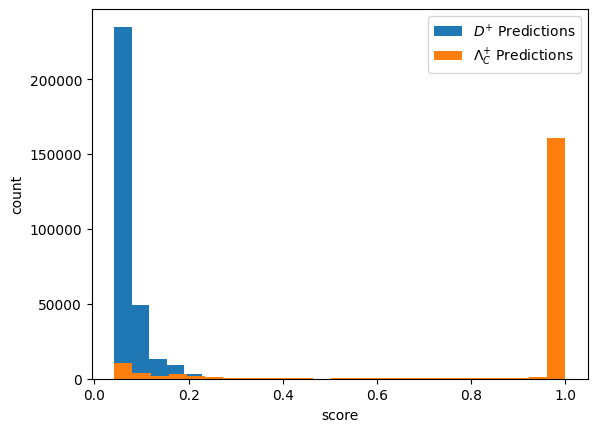

In [87]:
hist = plt.hist(predictions1, bins = 25, label = "$D^{+}$ Predictions")
hist2 = plt.hist(predictions2, bins = 25, label = "$\Lambda_C^{+}$ Predictions")
plt.xlabel("score")
plt.ylabel("count")
plt.legend()
plt.show()

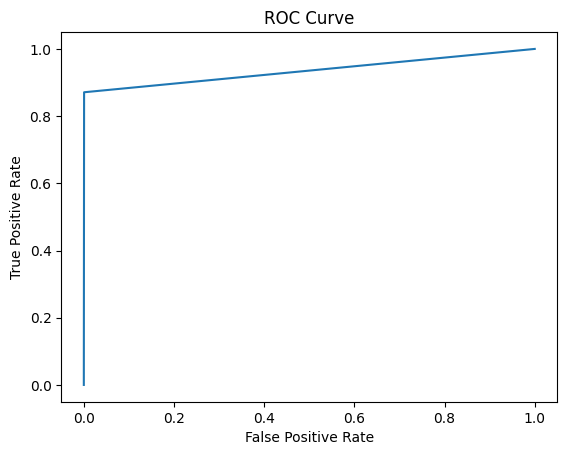

In [88]:
from sklearn.metrics import roc_curve

# Get true labels and predicted probabilities
y_true = y_test
y_pred = predictions_list

# Calculate TPR and FPR for different threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Plot ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
